> This notebook compares the results obtained with the proposed method and RANSAC

## Python Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error

In [2]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif"
})
plt.rcParams['font.size'] = '16'

## Load data

In [3]:
ransac = pd.read_csv('../ransac/2022-05-13-10-51-27/front-right.csv')

In [4]:
ours = pd.read_csv('../processed/2022-05-13-10-51-27/front-right.csv')

## Aligning solutions

In [5]:
aligned = []

In [6]:
for i in range(ours.shape[0]):
    t = ours.Time.iat[i]
    temp = np.abs(ransac.Time.to_numpy() - t)
    id = np.argmin(temp)
    if temp[id] < 0.1:
        aligned.append([t, ours.ref.iat[i], ours.est.iat[i], ransac.speed.iat[id]])

In [7]:
aligned = np.array(aligned, dtype=np.float64)

## Splitting the trajectory

In [8]:
seg01 = aligned[:2450]
seg02 = aligned[2450:4350]
seg03 = aligned[4350:7450]
seg04 = aligned[7450:9910]
seg05 = aligned[9910:13100]
seg06 = aligned[13100:]

## Saving segments

In [9]:
df = pd.DataFrame(seg01, columns=['Time','ref','proposed','ransac'])
df.to_csv('../processed/2022-05-13-10-51-27/seq01.csv', index=False)

In [10]:
df = pd.DataFrame(seg02, columns=['Time','ref','proposed','ransac'])
df.to_csv('../processed/2022-05-13-10-51-27/seq02.csv', index=False)

In [11]:
df = pd.DataFrame(seg03, columns=['Time','ref','proposed','ransac'])
df.to_csv('../processed/2022-05-13-10-51-27/seq03.csv', index=False)

In [12]:
df = pd.DataFrame(seg04, columns=['Time','ref','proposed','ransac'])
df.to_csv('../processed/2022-05-13-10-51-27/seq04.csv', index=False)

In [13]:
df = pd.DataFrame(seg05, columns=['Time','ref','proposed','ransac'])
df.to_csv('../processed/2022-05-13-10-51-27/seq05.csv', index=False)

In [14]:
df = pd.DataFrame(seg06, columns=['Time','ref','proposed','ransac'])
df.to_csv('../processed/2022-05-13-10-51-27/seq06.csv', index=False)

## Computing RMSE

In [15]:
idx = np.isnan(seg01[:,3])
print(f'RANSAC: {mean_squared_error(seg01[~idx,1], seg01[~idx,3], squared=False)} m/s')
print(f'OURS: {mean_squared_error(seg01[~idx,1], seg01[~idx,2], squared=False)} m/s')

RANSAC: 4.896170226361952 m/s
OURS: 0.3784756281331377 m/s


In [16]:
idx = np.isnan(seg02[:,3])
print(f'RANSAC: {mean_squared_error(seg02[~idx,1], seg02[~idx,3], squared=False)} m/s')
print(f'OURS: {mean_squared_error(seg02[~idx,1], seg02[~idx,2], squared=False)} m/s')

RANSAC: 2.4769413867160623 m/s
OURS: 0.4306927471523082 m/s


In [17]:
idx = np.isnan(seg03[:,3])
print(f'RANSAC: {mean_squared_error(seg03[~idx,1], seg03[~idx,3], squared=False)} m/s')
print(f'OURS: {mean_squared_error(seg03[~idx,1], seg03[~idx,2], squared=False)} m/s')

RANSAC: 2.1257533818125487 m/s
OURS: 0.2567884372844625 m/s


In [18]:
idx = np.isnan(seg04[:,3])
print(f'RANSAC: {mean_squared_error(seg04[~idx,1], seg04[~idx,3], squared=False)} m/s')
print(f'OURS: {mean_squared_error(seg04[~idx,1], seg04[~idx,2], squared=False)} m/s')

RANSAC: 6.211804608974889 m/s
OURS: 0.4633566477877151 m/s


In [19]:
idx = np.isnan(seg05[:,3])
print(f'RANSAC: {mean_squared_error(seg05[~idx,1], seg05[~idx,3], squared=False)} m/s')
print(f'OURS: {mean_squared_error(seg05[~idx,1], seg05[~idx,2], squared=False)} m/s')

RANSAC: 42.68064059525646 m/s
OURS: 0.26596535382331177 m/s


In [20]:
idx = np.isnan(seg06[:,3])
print(f'RANSAC: {mean_squared_error(seg06[~idx,1], seg06[~idx,3], squared=False)} m/s')
print(f'OURS: {mean_squared_error(seg06[~idx,1], seg06[~idx,2], squared=False)} m/s')

RANSAC: 79.18726654841134 m/s
OURS: 0.38373686314476324 m/s


## Plotting results

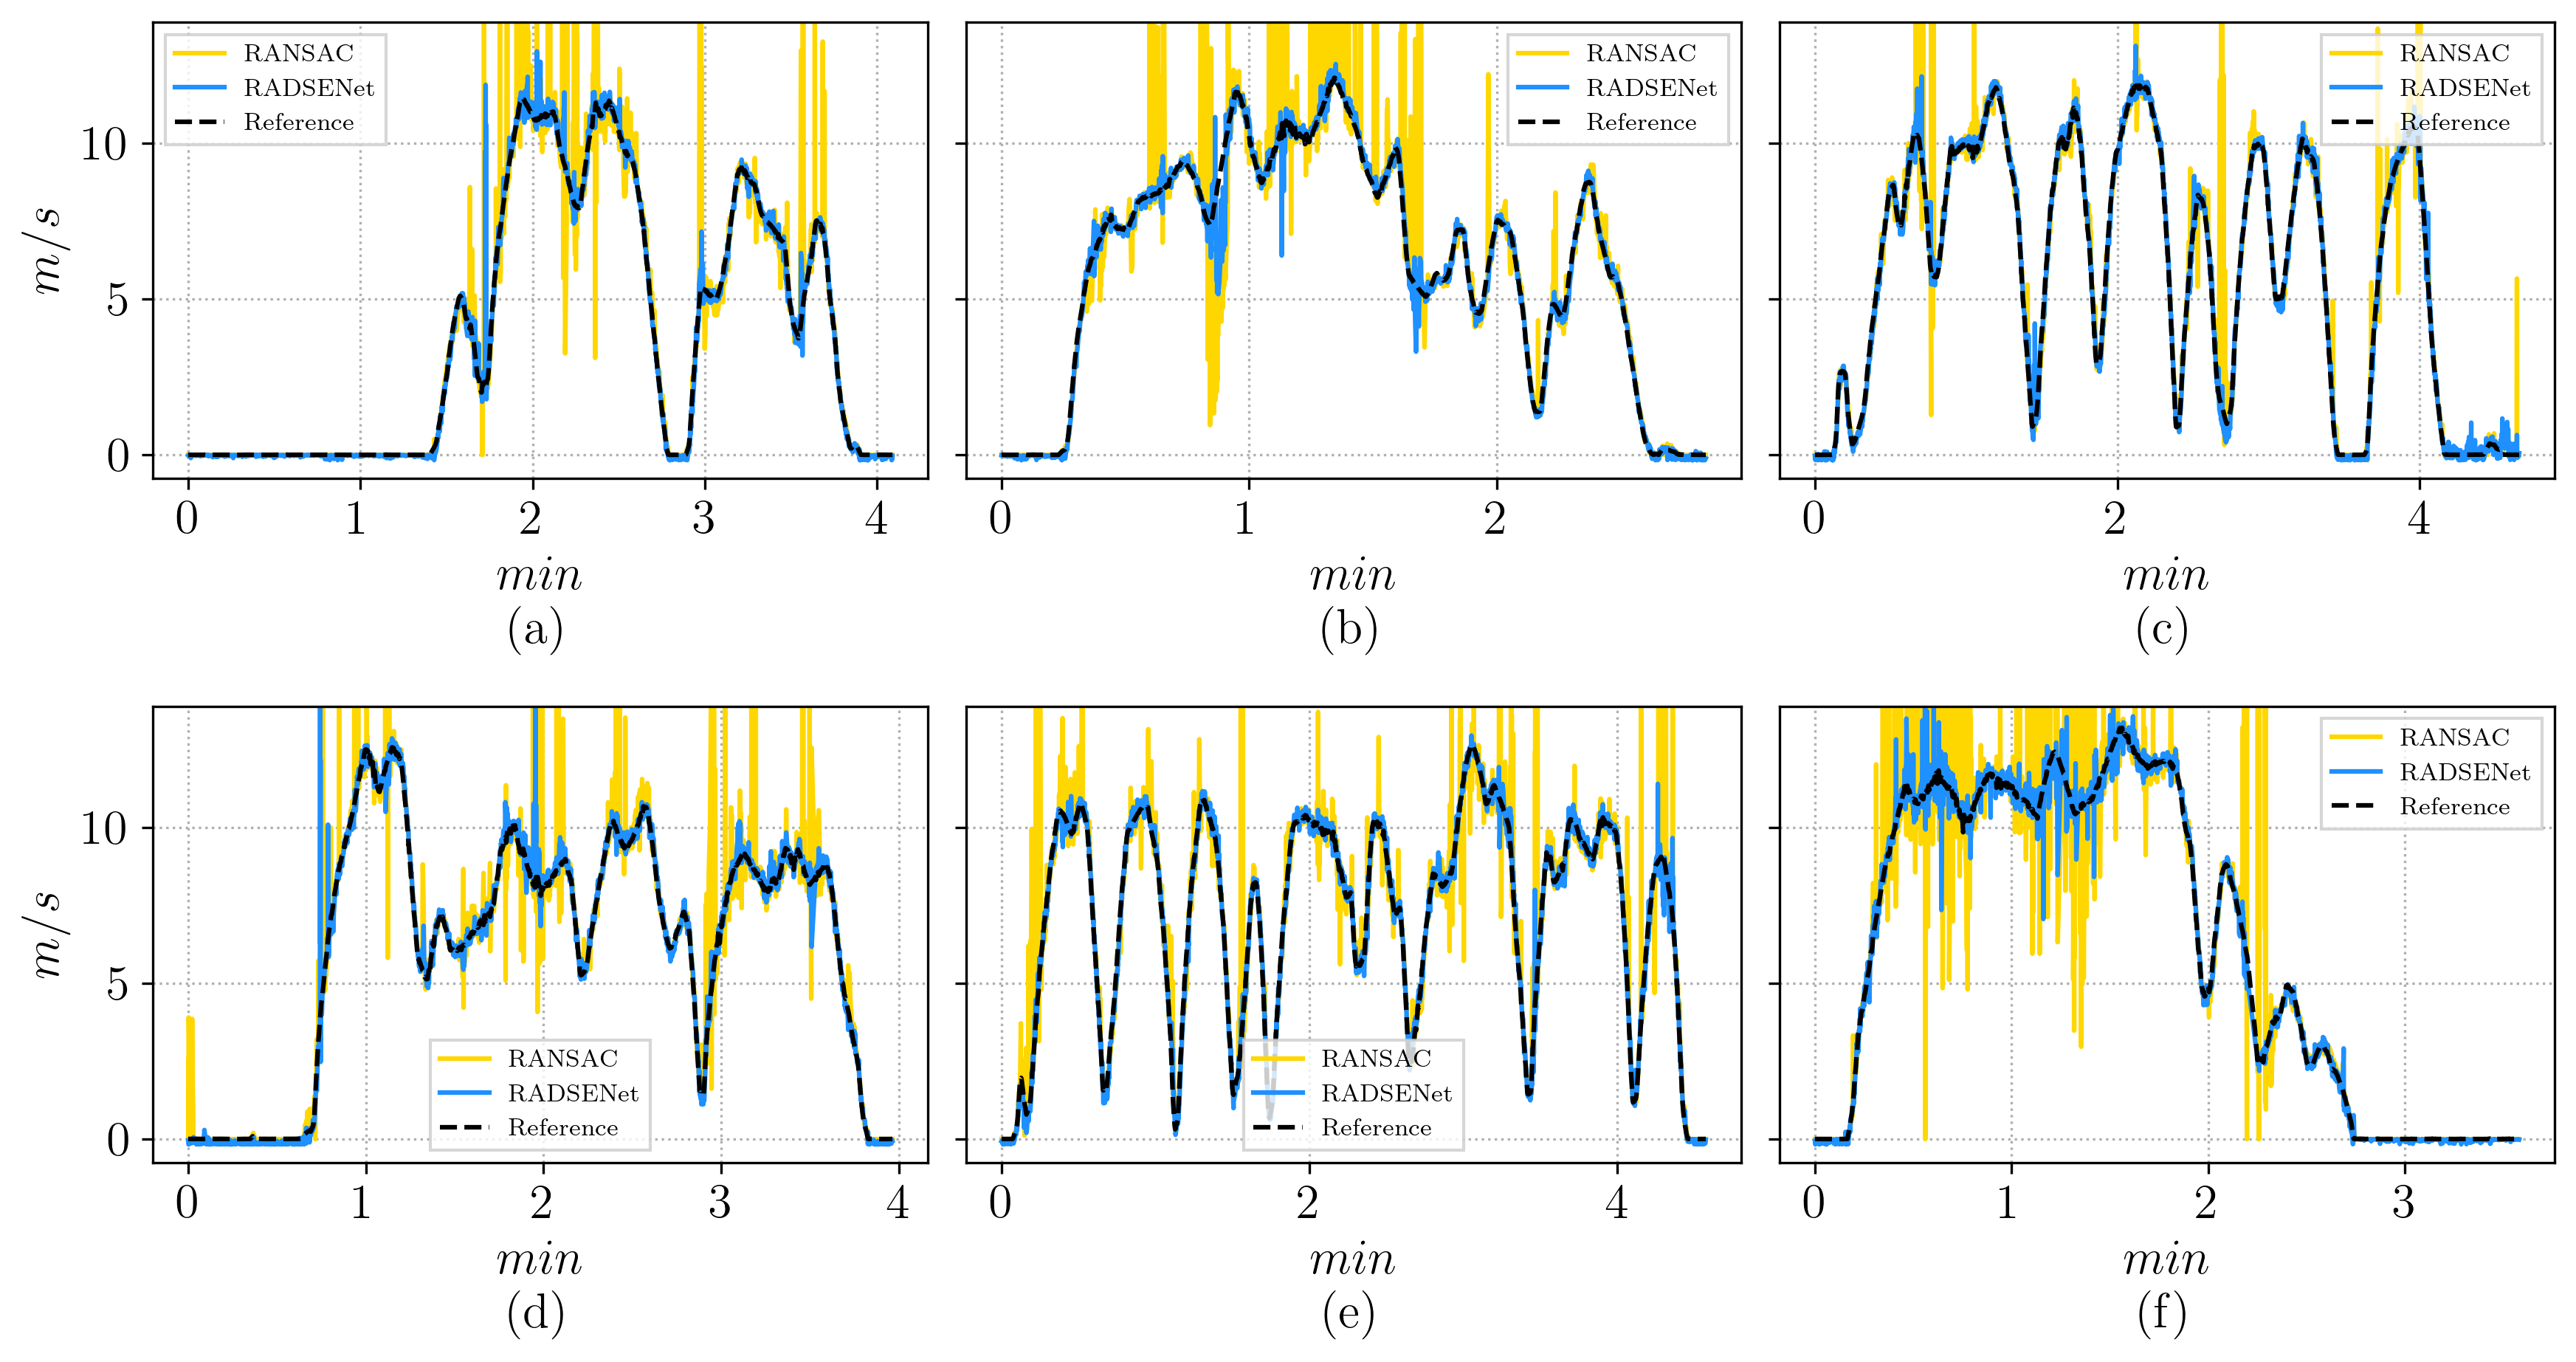

In [21]:
fig, [[ax1,ax2,ax3],[ax4,ax5,ax6]] = plt.subplots(2,3,figsize=[12, 6], sharey=True)
plt.tight_layout()
plt.subplots_adjust(hspace=0.5, wspace=0.05)

ax1.set_ylim(bottom=-0.75,top=13.88)
ax1.set_ylabel('$m/s$')
ax4.set_ylabel('$m/s$')
ax1.set_xlabel('$min$ \n (a)')
ax2.set_xlabel('$min$ \n (b)')
ax3.set_xlabel('$min$ \n (c)')
ax4.set_xlabel('$min$ \n (d)')
ax5.set_xlabel('$min$ \n (e)')
ax6.set_xlabel('$min$ \n (f)')

ax1.grid(linestyle=':')
ax2.grid(linestyle=':')
ax3.grid(linestyle=':')
ax4.grid(linestyle=':')
ax5.grid(linestyle=':')
ax6.grid(linestyle=':')


# RANSAC
ax1.plot((seg01[:,0]-seg01[0,0])/60, seg01[:,3], 'gold', label='RANSAC')
ax2.plot((seg02[:,0]-seg02[0,0])/60, seg02[:,3], 'gold', label='RANSAC')
ax3.plot((seg03[:,0]-seg03[0,0])/60, seg03[:,3], 'gold', label='RANSAC')
ax4.plot((seg04[:,0]-seg04[0,0])/60, seg04[:,3], 'gold', label='RANSAC')
ax5.plot((seg05[:,0]-seg05[0,0])/60, seg05[:,3], 'gold', label='RANSAC')
ax6.plot((seg06[:,0]-seg06[0,0])/60, seg06[:,3], 'gold', label='RANSAC')

# Ours
ax1.plot((seg01[:,0]-seg01[0,0])/60, seg01[:,2], 'dodgerblue', label='RADSENet')
ax2.plot((seg02[:,0]-seg02[0,0])/60, seg02[:,2], 'dodgerblue', label='RADSENet')
ax3.plot((seg03[:,0]-seg03[0,0])/60, seg03[:,2], 'dodgerblue', label='RADSENet')
ax4.plot((seg04[:,0]-seg04[0,0])/60, seg04[:,2], 'dodgerblue', label='RADSENet')
ax5.plot((seg05[:,0]-seg05[0,0])/60, seg05[:,2], 'dodgerblue', label='RADSENet')
ax6.plot((seg06[:,0]-seg06[0,0])/60, seg06[:,2], 'dodgerblue', label='RADSENet')

# Reference
ax1.plot((seg01[:,0]-seg01[0,0])/60, seg01[:,1], '--k', label='Reference')
ax2.plot((seg02[:,0]-seg02[0,0])/60, seg02[:,1], '--k', label='Reference')
ax3.plot((seg03[:,0]-seg03[0,0])/60, seg03[:,1], '--k', label='Reference')
ax4.plot((seg04[:,0]-seg04[0,0])/60, seg04[:,1], '--k', label='Reference')
ax5.plot((seg05[:,0]-seg05[0,0])/60, seg05[:,1], '--k', label='Reference')
ax6.plot((seg06[:,0]-seg06[0,0])/60, seg06[:,1], '--k', label='Reference')

ax1.legend(fancybox=False, fontsize=8)
ax2.legend(fancybox=False, fontsize=8)
ax3.legend(fancybox=False, fontsize=8)
ax4.legend(fancybox=False, fontsize=8)
ax5.legend(fancybox=False, fontsize=8)
ax6.legend(fancybox=False, fontsize=8)

plt.savefig('comparison.png', dpi=300);
plt.show()
